In [47]:
!pip install matplotlib

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
btc = yf.download("BTC-USD", start="2020-01-01", end="2025-07-12")  

btc = btc[['Close']]
btc.dropna(inplace=True)


C:\Users\Sandra Kimiring\AppData\Local\Temp\ipykernel_19692\3879243400.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2020-01-01", end="2025-07-12")
[*********************100%***********************]  1 of 1 completed


In [50]:
btc.head()

Price,Close
Ticker,BTC-USD
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


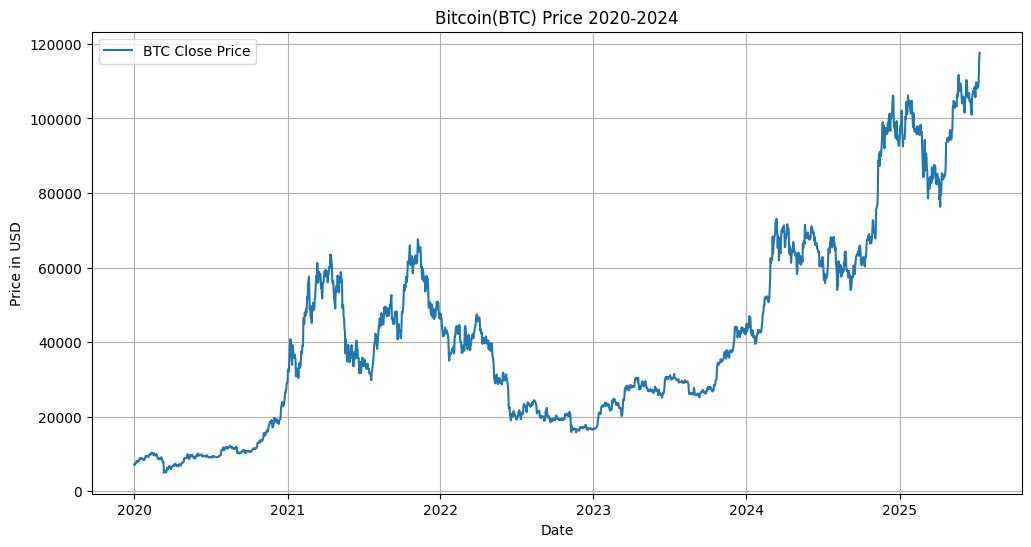

In [51]:
plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label='BTC Close Price')
plt.title('Bitcoin(BTC) Price 2020-2024')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid()
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Scaler = MinMaxScaler()
Scaled_data = Scaler.fit_transform(btc[['Close']])

scaled_data = np.array(Scaled_data)

Scaled_data[:5]




array([[0.01978949],
       [0.01788363],
       [0.02107403],
       [0.02165786],
       [0.02166373]])

In [53]:
sequence_length = 60 

X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  
    y.append(scaled_data[i, 0])                    

X, y = np.array(X), np.array(y)

# Reshape for LSTM 
X = X.reshape((X.shape[0], X.shape[1], 1))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1959, 60, 1)
Shape of y: (1959,)


In [54]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1567, 60, 1)
X_test shape: (392, 60, 1)


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


c:\Users\Sandra Kimiring\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history= model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0137 - val_loss: 0.0031
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 7.3535e-04 - val_loss: 0.0016
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.2572e-04 - val_loss: 0.0011
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.9187e-04 - val_loss: 0.0010
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.2834e-04 - val_loss: 9.5364e-04
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.2073e-04 - val_loss: 9.2741e-04
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.8556e-04 - val_loss: 8.3372e-04
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.4295e-04 - val_loss: 8.5611e-04
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.4980e-04 - val_loss: 0.0012
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.2889e-04 - val_loss: 0.0011
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.3821e-04 - val_loss: 9.8114e-04
Epo

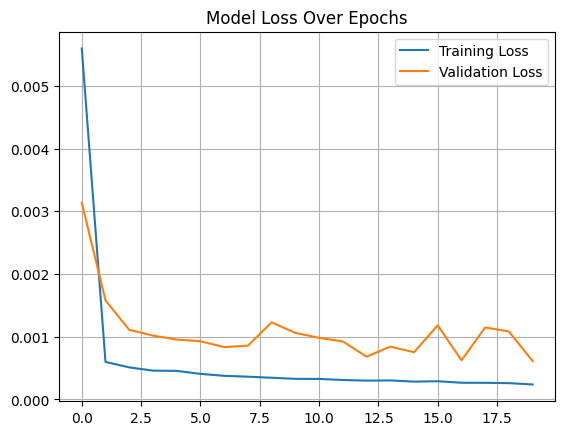

In [57]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


In [58]:
predicted_prices = model.predict(X_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [59]:
from sklearn.preprocessing import MinMaxScaler
predicted_prices = Scaler.inverse_transform(predicted_prices)
actual_prices = Scaler.inverse_transform(y_test.reshape(-1, 1))


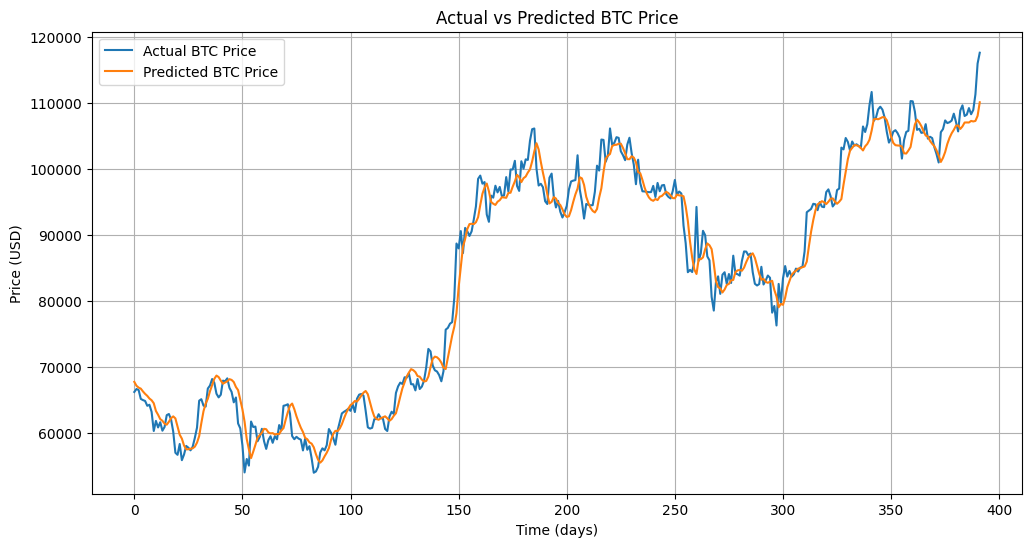

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual BTC Price')
plt.plot(predicted_prices, label='Predicted BTC Price')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Time (days)")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 2781.82


In [62]:
avg_btc_price = actual_prices.mean()

print(f"Average BTC Price (Test Set): ${avg_btc_price:.2f}")
print(f"RMSE: ${rmse:.2f}")

percentage_error = (rmse / avg_btc_price) * 100
print(f"RMSE as % of Avg BTC Price: {percentage_error:.2f}%")


Average BTC Price (Test Set): $83936.20
RMSE: $2781.82
RMSE as % of Avg BTC Price: 3.31%


In [63]:
model.save("btc_lstm_model.keras")
